# CS579: Lecture 02
# Data Collection

<br><br>

*[Dr. Aron Culotta](http://cs.iit.edu/~culotta)*  
*[Illinois Institute of Technology](http://iit.edu)*

<br><br><br><br><br><br>
<br><br><br><br><br><br>

**Today's Goals**
- Give examples of
  - Collecting Twitter data
  - Constructing social graphs with networkx
  - Python tips and tricks
- Discuss the first assignment

# Twitter

- Platform for broadcasting messages.
- https://twitter.com/justinbieber
<br><br><br><br><br><br>

# Twitter Jargon

- **tweet**: A message, max 140 characters
- **timeline**: A list of tweets from a user
- **follower**: If user $A$ follows $B$, $A$ will receive tweets from $B$'s timeline
- **friend**: If $A$ follows $B$, then $B$ is a *friend* of $A$.
  - Notice the asymmetry: If $A$ follows $B$, but $B$ does not follow $A$, then $A$ is not a friend of $B$.

<br><br><br><br><br><br>


# Twitter API

- https://dev.twitter.com/
- Provides programmatic access to *public* Twitter data
  - *direct messages* not included
  - A user can set their timeline to be private, but this is rare.
  
 <br><br><br><br><br><br>


# Twitter API

Two sub-APIs:
- *[REST API](https://dev.twitter.com/docs/api/1.1)*: Submit HTTP requests to access specific information (tweets, friends, ...)
- *[Streaming API](https://dev.twitter.com/docs/api/streaming)*: Open a continuous connection to Twitter to receive real-time data.

These APIs are simply HTTP GET requests:

https://api.twitter.com/1.1/search/tweets.json?q=chicago

<br><br><br><br><br><br>


# Authentication

- Twitter uses [OAuth](https://dev.twitter.com/docs/auth/oauth) to enable secure requests to the API
- After creating an account, you can generate tokens: https://dev.twitter.com/docs/auth/tokens-devtwittercom
- These tokens will be sent with each API request
- Many libraries exist to make this easier: https://dev.twitter.com/docs/twitter-libraries
<br><br><br><br><br><br>


In [4]:
# Create a Twitter connection using TwitterAPI:
#   https://github.com/geduldig/TwitterAPI
# Start with `pip install TwitterAPI`
# You'll need to edit twitter.cfg with your own tokens.
import configparser
from TwitterAPI import TwitterAPI

def get_twitter(config_file):
    """ Read the config_file and construct an instance of TwitterAPI.
    Args:
      config_file ... A config file in ConfigParser format with Twitter credentials
    Returns:
      An instance of TwitterAPI.
    """
    config = configparser.ConfigParser()
    config.read(config_file)
    twitter = TwitterAPI(
                   config.get('twitter', 'consumer_key'),
                   config.get('twitter', 'consumer_secret'),
                   config.get('twitter', 'access_token'),
                   config.get('twitter', 'access_token_secret'))
    return twitter

twitter = get_twitter('twitter.cfg')
print('Established Twitter connection.')

Established Twitter connection.


In [5]:
type(twitter)

TwitterAPI.TwitterAPI.TwitterAPI

In [6]:
# What can we do with this twitter object?
# builtin method `dir` tells us...
dir(twitter)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_endpoint',
 '_prepare_url',
 'auth',
 'proxies',
 'request']

In [7]:
# Get help on the `request` method using the builtin method called...`help`
help(twitter.request)

Help on method request in module TwitterAPI.TwitterAPI:

request(resource, params=None, files=None, method_override=None) method of TwitterAPI.TwitterAPI.TwitterAPI instance
    Request a Twitter REST API or Streaming API resource.
    
    :param resource: A valid Twitter endpoint (ex. "search/tweets")
    :param params: Dictionary with endpoint parameters or None (default)
    :param files: Dictionary with multipart-encoded file or None (default)
    :param method_override: Request method to override or None (default)
    
    :returns: TwitterResponse
    :raises: TwitterConnectionError



In [8]:
# Let's start by querying the search API
request = twitter.request('search/tweets', {'q': 'chicago'}) 

In [10]:
# What object is returned?
# builtin type method will tell us.
print(type(request))
dir(request)

<class 'TwitterAPI.TwitterAPI.TwitterResponse'>


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'close',
 'get_iterator',
 'get_rest_quota',
 'headers',
 'json',
 'response',
 'status_code',
 'stream',
 'text']

In [11]:
request.status_code
# See https://dev.twitter.com/overview/api/response-codes

200

In [13]:
for i in [1,2,3]:
    print(i)

1
2
3


In [15]:
print([i*2 for i in [1,2,3]])

[2, 4, 6]


In [16]:
# The __iter__ method means we can loop over this object.
# See https://wiki.python.org/moin/Iterator
tweets = [r for r in request]
# List comprehensions used a lot in Python. See:
# https://docs.python.org/2/tutorial/datastructures.html

In [17]:
print('found %d tweets' % len(tweets))

found 15 tweets


In [18]:
# What is the first tweet?
a_tweet = tweets[0]
type(a_tweet)

dict

In [19]:
# What can we do with dicts?
help(a_tweet)

Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

In [20]:
# Print keys.
a_tweet.keys()

dict_keys(['geo', 'user', 'favorite_count', 'lang', 'entities', 'place', 'retweeted', 'is_quote_status', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'possibly_sensitive', 'in_reply_to_status_id', 'coordinates', 'favorited', 'metadata', 'created_at', 'in_reply_to_status_id_str', 'extended_entities', 'source', 'id_str', 'id', 'retweet_count', 'contributors', 'text', 'retweeted_status', 'truncated', 'in_reply_to_user_id'])

In [21]:
# The text.
print(a_tweet['text'])
print(a_tweet['created_at'])

RT @Chloe_Boor: came across this dope ass girl at the train station in Chicago. make this go viral. she deserves to be famous. https://t.co…
Wed Aug 24 18:11:24 +0000 2016


In [22]:
# What is a user?...another dict
a_tweet['user']

{'contributors_enabled': False,
 'created_at': 'Sun Aug 02 18:57:56 +0000 2009',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'My fave rapper coined the term Bling Bling. Protect Mike Moore at all costs. RIP Sam. Tryna make music? tellybambaataa@gmail.com',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'datpiff.com/Telly-Still-Le…',
     'expanded_url': 'http://www.datpiff.com/Telly-Still-Learning-mixtape.334405.html',
     'indices': [0, 23],
     'url': 'https://t.co/OEAzKVYGch'}]}},
 'favourites_count': 19783,
 'follow_request_sent': False,
 'followers_count': 2332,
 'following': False,
 'friends_count': 1561,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 62324180,
 'id_str': '62324180',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 48,
 'location': 'in the cutterino',
 'name': 'Bic Flair',
 'notifications': False,
 'profile_background_color': '0099B9',
 'profile

In [23]:
user = a_tweet['user']
print('screen_name=%s, name=%s, location=%s' % (user['screen_name'], user['name'], user['location']))

screen_name=TellyLaFlare, name=Bic Flair, location=in the cutterino


In [24]:
# Who follows this person?
# https://dev.twitter.com/docs/api/1.1/get/followers/list
screen_name = user['screen_name']
request = twitter.request('followers/list', {'screen_name': screen_name, 'count':200})
followers = [r for r in request]
        
print('found %d followers for %s' % (len(followers), screen_name))
# See more about paging here: https://dev.twitter.com/docs/working-with-timelines

found 200 followers for TellyLaFlare


In [29]:
type(followers[0])

dict

In [28]:
followers[0].keys()

dict_keys(['is_translation_enabled', 'lang', 'name', 'entities', 'location', 'profile_sidebar_border_color', 'is_translator', 'notifications', 'followers_count', 'listed_count', 'profile_text_color', 'profile_image_url', 'geo_enabled', 'profile_background_image_url', 'created_at', 'time_zone', 'follow_request_sent', 'favourites_count', 'protected', 'muting', 'profile_link_color', 'id_str', 'default_profile', 'profile_use_background_image', 'screen_name', 'status', 'blocking', 'friends_count', 'id', 'utc_offset', 'profile_banner_url', 'following', 'url', 'verified', 'profile_background_color', 'has_extended_profile', 'contributors_enabled', 'statuses_count', 'live_following', 'blocked_by', 'default_profile_image', 'profile_image_url_https', 'profile_background_image_url_https', 'profile_background_tile', 'description', 'profile_sidebar_fill_color'])

In [30]:
followers[0]['screen_name']

'WhyYouHatePurlz'

In [31]:
# What happens if we get an error?
request = twitter.request('followers/list', {'screen_name': 'this_is_not_a_valid_screen_name', 'count':200})

In [32]:
bad_followers = [r for r in request]

TwitterRequestError: Twitter request failed (404)

In [33]:
request.status_code

404

# Limitations

- Can only search 2 weeks in past
  - But can get up to 3,200 most recent tweets of a user
- Rate limits! https://dev.twitter.com/docs/rate-limiting/1.1/limits
  - e.g., 180 requests in 15 minute window

In [34]:
# Working around rate limits.
def robust_request(twitter, resource, params, max_tries=5):
    """ If a Twitter request fails, sleep for 15 minutes.
    Do this at most max_tries times before quitting.
    Args:
      twitter .... A TwitterAPI object.
      resource ... A resource string to request.
      params ..... A parameter dictionary for the request.
      max_tries .. The maximum number of tries to attempt.
    Returns:
      A TwitterResponse object, or None if failed.
    """
    for i in range(max_tries):
        request = twitter.request(resource, params)
        if request.status_code == 200:
            return request
        else:
            print('Got error: %s \nsleeping for 15 minutes.' % request.text)
            time.sleep(61 * 15)

## Drawing graphs with NetworkX

In [ ]:
# Drawing graphs: http://networkx.github.io/
# `pip install networkx`
import networkx as nx
# Create a graph
graph = nx.DiGraph()
# Add a node
graph.add_node(screen_name)
# Draw the graph
nx.draw(graph, with_labels=True)

In [ ]:
# Didn't draw anything? Need to place it inline.
import matplotlib.pyplot as plt  
%matplotlib inline
# See many more magic spells:
# http://ipython.org/ipython-doc/stable/interactive/reference.html#magic-command-system

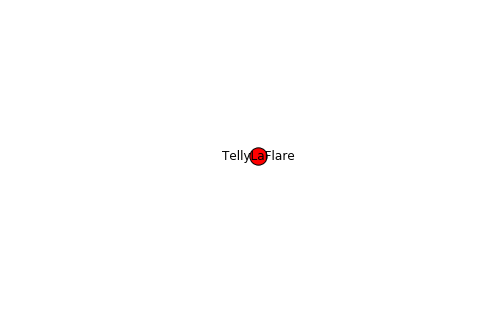

In [38]:
nx.draw(graph, with_labels=True)

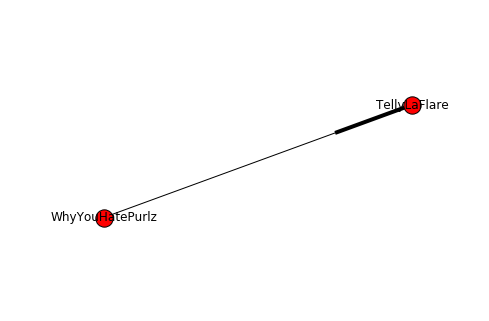

In [39]:
# Add an edge to a follower
graph.add_edge(followers[0]['screen_name'], screen_name)
nx.draw(graph, with_labels=True)

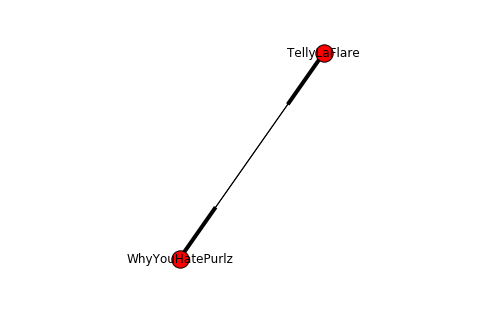

In [40]:
# Make link symmetric.
graph.add_edge(screen_name, followers[0]['screen_name'])
nx.draw(graph, with_labels=True)

In [41]:
# Get this person's timeline
timeline = [tweet for tweet in twitter.request('statuses/user_timeline',
                                                {'screen_name': screen_name,
                                                 'count': 200})]
print('got %d tweets for user %s' % (len(timeline), screen_name))

got 199 tweets for user TellyLaFlare


** Why not 200? **

In [43]:
# Print the text.
print('\n'.join(t['text'] for t in timeline))

We need that joint album https://t.co/r9elK5gbov
RT @coupIegoaIs: This is why relationships end. Appreciate what you have when you have it. https://t.co/QKNjVv8SCj
RT @876slym: going to school with a full face of makeup  https://t.co/51dpJFF62l
RT @projectFem4All: tw: rape 

this is such a good analogy https://t.co/WIpB4rrRkt
RT @Chloe_Boor: came across this dope ass girl at the train station in Chicago. make this go viral. she deserves to be famous. https://t.co…
@Rauldough haven't seen them.. Yet😒
@MONTstrosity bruh someone allegedly leaked her shit. Im terrified.
Anybody who retweets Leslie Jones nudes getting reported as spam.
Facts https://t.co/uNqcSq7Rrm
RT @wanya___x: Bible fact  https://t.co/qLr4st4fP4
RT @n9viv: prime example: people hate to see you shine &amp; prosper.  https://t.co/UxsVs3ymQ7
RT @beautydollmarie: "You from the projects how you cant hit a blunt?" LMFAOOOOO NAA 😂💀💀💀 https://t.co/K3SCUyixDM
Lmaooooo https://t.co/So4ilML7uQ
RT @Fant4stic63: Because of the hype i

In [47]:
from collections import Counter  # This is just a fancy dict mapping from object->int, starting at 0.
c = Counter()
c.update([1,2,1])
print(c)
c.update([1,2,1])
print(c)

Counter({1: 2, 2: 1})
Counter({1: 4, 2: 2})


In [48]:
# Count words
counts = Counter()
for tweet in timeline:
    counts.update(tweet['text'].lower().split())  # to lower case; split on whitespace.
print('found %d unique terms in %d tweets' % (len(counts), len(timeline)))
counts.most_common(10)

found 1269 unique terms in 199 tweets


[('rt', 171),
 ('the', 39),
 ('you', 35),
 ('to', 31),
 ('a', 31),
 ('of', 20),
 ('i', 20),
 ('and', 17),
 ('on', 16),
 ('this', 16)]

In [49]:
sorted([5,4,-10,-1], key=lambda x: -x)

[5, 4, -1, -10]

In [50]:
# Sort by value, descending.
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
# See more about Python's lambda expressions:
# https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions

print('\n'.join('%s=%d' % (item[0], item[1]) 
                 for item in sorted_counts))

rt=171
the=39
you=35
to=31
a=31
of=20
i=20
and=17
on=16
this=16
my=15
be=14
that=14
she=14
in=13
for=13
when=12
with=12
at=11
like=11
is=10
me=9
he=9
but=8
who=8
what=8
if=8
was=7
your=7
have=7
it=7
her=6
need=6
get=6
people=6
than=6
@lilnei41:=6
more=6
really=6
got=6
just=6
are=6
go=5
how=5
out=5
know=5
am=5
so=5
woman=4
ya=4
new=4
its=4
don't=4
didn't=4
school=4
been=4
@bostnstrongdong=4
@juice_mme=4
used=4
lmao=4
as=4
good=4
up=4
now=4
life=4
them=4
man=4
his=4
women=4
frank=3
@3l_sharpito=3
make=3
bruh=3
because=3
never=3
@nikowavy:=3
chris=3
has=3
😂=3
white=3
dropped=3
&amp;=3
first=3
fucking=3
by=3
😂😂=3
y'all=3
had=3
yea=3
@gradyaikens:=3
dawg=3
@baked_poteytoo:=3
him=3
fuck=3
&gt;=3
going=3
date=3
did=3
i'm=3
will=3
girl=3
looks=3
most=3
shit=3
too=3
no=3
look=3
nobody=3
high=3
we=3
around=3
it's=3
stop=3
@hakunamatatao_o=3
an=3
all=3
can't=3
mood=3
much=3
u=2
aye=2
me:=2
her:=2
or=2
version=2
want=2
@iad3uxieme:=2
way=2
lmfao=2
ever=2
https://t.co…=2
.....=2
@__delay:=2
https:/

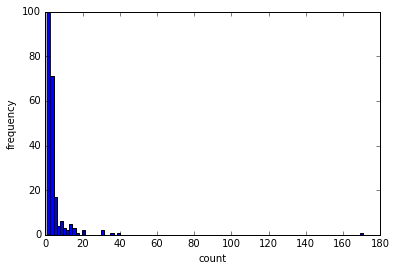

In [53]:
# Plot these counts.
import matplotlib.pyplot as plt
plt.hist(list(counts.values()), bins=100)
plt.xlabel('count')
plt.ylabel('frequency')
plt.ylim((0,100))
plt.show()

**Zipf's Law**: (roughly) there are many rare words; there are a small number of extremely frequent words.